### RFM Clustering 
###### By Deyoz Rayamajhi

#### Introduction

Recency, Frequency and Monetary (RFM) analysis is very powerful technique to segment the customers. It helps to formulate strategy for the marketing campaign and to predict how a new customer is likely to act in the future. An RFM model is built using three key factors:

1. How recently a customer has purchased the product
2. How frequently they have purchased the product
3. How much money they have spent on a products

Taking these three factors into the consideration, RFM analysis helps us to group our customers into different clusters, based on the values they brought to the company. These clusters can be used for achieving several marketing objectives. 
For the analysis, we just require customer trasanction data, containing following theree varibles:
    1. Customer ID
    2. Purchase / Transaction data
    3. Transaction Amount 
We derived other variables for the analysis and is dicussed in the following data preparation section.
calculate total transaction per customer, most recent purhase, startdate(first purchase), relationship lenght, monetary, frequency, recency and Gap. 


#### Data Preparation

Data is prepared in exel, using excel basic functions. 
The following variables are derived. 
1. customer : It is simply a list if unique customers. As there are 256 unique customers, we list them from 1 to 256 manually. 
2. totaltransac = It is a number of total transactions made by each unique customer. It is calculated by uising COUNTIF function.
3. mostrecent = It is a most recent date, a customer had made transaction/s. It is calculated using MAXIFS function. 
4. startdate = It is the date a custumer had made first transaction. It is calulated using MINIFS function.
5. relationshiplength = It is the duration (in years) that the customers are in relationship with us. It is calculated as (reporting date - startdate)/365. We used 1/1/2019 as reporting date. 
6. monetary = It is revenue per year on an average generated from each customer. It is calculated summing up all the transaction amount of each customer, using SUMIFS function and divided by corresponding relationshiplength.
7. frequency = It is average frequency of transactions per year by each customer. It is calulated by dividing totaltransac by relationshiplength.
8. recency = It is days past since last purchase by the each customers. It is calculated as (reporting date - most recent)/365. We used 1/1/2019 as reporting date.
9. Gap = It is average gap of transaction (in years). It is calculated bt the dividing relationshiplength by totaltransaction. This variable is optional in RFM cluster Analysis.

The data with above mention variables are imported here. 

##### Importing Required Packages and Libraries 

In [1]:
import pandas as pd
from pandas import DataFrame 
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np 
%matplotlib inline
import matplotlib
from matplotlib.pyplot import figure

In [2]:
import warnings
warnings.filterwarnings('ignore')

###### Reading a dataset

In [3]:
data = pd.read_csv('D://MSBA//Third Sem//MKT9737//RFM//RFM_Data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256 entries, 0 to 255
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer            256 non-null    int64  
 1   totaltransac        256 non-null    int64  
 2   mostrecent          256 non-null    object 
 3   startdate           256 non-null    object 
 4   relationshiplength  256 non-null    float64
 5   monetary            256 non-null    float64
 6   frequency           256 non-null    float64
 7   recency             256 non-null    float64
 8   Gap                 256 non-null    float64
dtypes: float64(5), int64(2), object(2)
memory usage: 18.1+ KB


Comment:
    1. in the initial dataset, there were only "customer",'mostrecent' and 'startdate' variables: All other varuiables are calculated using excel functions and imported here for clustering.

Comment 2:
    as it is observed that there are no n/a and also required variable type are float. Howevever, for the clustering, it is required to scale the data. For this purpose, we use StandardScaler. 

### K-Means Clustering 

##### Import libraries for clusterings

In [4]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

##### drop customer, mostrecent and startdate columns to create dataframe having only numeric values

In [5]:

df_num = data.loc[:, data.columns.drop(['customer',
                                        'mostrecent','startdate'])]


##### Create the dataframe having just customer variable

In [6]:
df_cust = data['customer']
df_cust.head()

0    1
1    2
2    3
3    4
4    5
Name: customer, dtype: int64

Comment:
    1. We will join this df_cust with the dataset that has cluster data, which is derived in subsequent sections.
    

##### Scaling Total Transaction, Relationship Length, Monetary Value, Freqency, Recency, Average_Gap

Instantiation of Scaler

In [7]:
scaler = StandardScaler()

In [8]:
df_num_t = scaler.fit_transform(df_num)
columns = ['totaltransac_t', 'relationshiplength_t', 
           'monetary_t', 'frequency_t', 'recency_t', "Gap_t"]
df_num_t = pd.DataFrame(df_num_t, columns = columns)
df_num_t.head()

,totaltransac_t,relationshiplength_t,monetary_t,frequency_t,recency_t,Gap_t
0,-0.079041,-0.149854,0.231073,-0.045948,0.573013,-0.188947
1,-1.158217,0.315252,-1.031476,-1.251612,-0.065617,1.310537
2,-0.618629,0.780359,-0.942766,-0.898735,-0.839713,0.730091
3,0.190753,-0.253211,0.282932,0.277523,-0.684894,-0.479170
4,-1.428011,0.849264,-1.966627,-1.633896,2.488902,2.132834


### Cluster Analysis


Now we have transform the required data and are ready for clusterings. First we determine two variables clusters and in the final section we create three variables (RFM_cluster)

#### Cluster: Monetary and Frequency

#### Determination of the optimum number of cluster (k), in which intertia is minimum 

Text(0.5, 1.0, 'inertia by number of cluster for monetary and frequency')

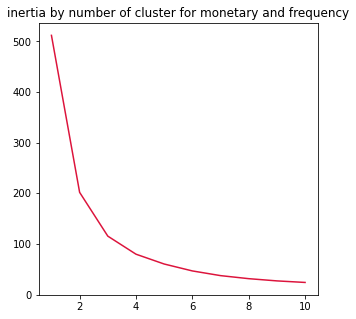

In [9]:
inertia_score1 = list()
for i in range (1,11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_num_t[['monetary_t', 'frequency_t']])
    inertia_score1.append(kmeans.inertia_)
matplotlib.rcParams['figure.figsize'] = (5,5)
plt.plot(range(1,11), inertia_score1, color = 'crimson')
plt.title ('inertia by number of cluster for monetary and frequency')

Comments:
    it is observed that at cluster=3, the inertia drops slowly adn becomes quite steady. So, we will generate 3 clusters.

##### instantiation of clustering1

In [10]:
mon_freq_cluster = KMeans(n_clusters = 3)

##### model fitting


In [11]:
mon_freq_cluster.fit(df_num_t[['monetary_t', 'frequency_t']])

KMeans(n_clusters=3)

In [12]:
df_num_t['mon_freq_cluster'] = mon_freq_cluster.labels_
df_num_t.head()

,totaltransac_t,relationshiplength_t,monetary_t,frequency_t,recency_t,Gap_t,mon_freq_cluster
0,-0.079041,-0.149854,0.231073,-0.045948,0.573013,-0.188947,2
1,-1.158217,0.315252,-1.031476,-1.251612,-0.065617,1.310537,0
2,-0.618629,0.780359,-0.942766,-0.898735,-0.839713,0.730091,0
3,0.190753,-0.253211,0.282932,0.277523,-0.684894,-0.479170,2
4,-1.428011,0.849264,-1.966627,-1.633896,2.488902,2.132834,0


[Text(0.5, 1.0, 'Customer Cluster by monetary and Frequency')]

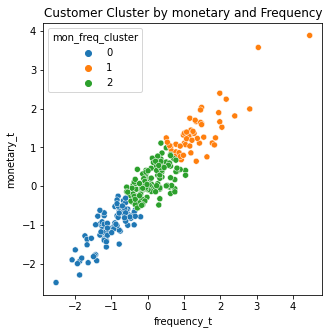

In [13]:
sns.scatterplot(data = df_num_t, x = 'frequency_t', y = 'monetary_t', 
                hue = 'mon_freq_cluster', palette = 'tab10'). set(title = 'Customer Cluster by monetary and Frequency')

##### join the dataframes to develop the cross table 

In [14]:
df_integrated  = pd.DataFrame(df_num_t).join(df_cust)
df_integrated.head()

,totaltransac_t,relationshiplength_t,monetary_t,frequency_t,recency_t,Gap_t,mon_freq_cluster,customer
0,-0.079041,-0.149854,0.231073,-0.045948,0.573013,-0.188947,2,1
1,-1.158217,0.315252,-1.031476,-1.251612,-0.065617,1.310537,0,2
2,-0.618629,0.780359,-0.942766,-0.898735,-0.839713,0.730091,0,3
3,0.190753,-0.253211,0.282932,0.277523,-0.684894,-0.479170,2,4
4,-1.428011,0.849264,-1.966627,-1.633896,2.488902,2.132834,0,5


In [15]:
ct1 = pd.crosstab(df_integrated['mon_freq_cluster'], df_integrated['customer'].value_counts())

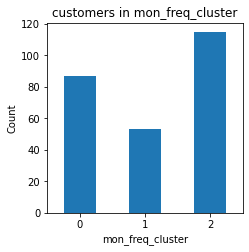

In [16]:
barrplot1 = ct1.plot.bar(rot=360, legend = False, 
                         ylabel = 'Count', color = 'tab:blue',
                         title ='customers in mon_freq_cluster')
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(3.5, 3.5)

#### Cluster: Monetary and Recency

Text(0.5, 1.0, 'inertia by number of clusters for monetary and recency')

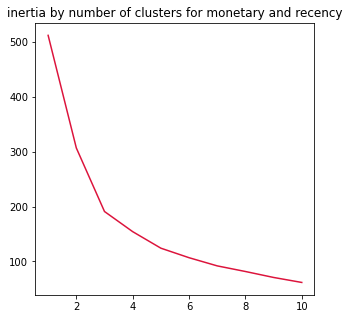

In [17]:
inertia_score2= list()
for i in range (1, 11):
    kmeans1= KMeans(n_clusters= i)
    kmeans1.fit(df_integrated[['monetary_t','recency_t']])
    inertia_score2.append(kmeans1.inertia_)
matplotlib.rcParams['figure.figsize'] = (5,5)
plt.plot(range(1,11), inertia_score2, color = 'crimson')
plt.title ('inertia by number of clusters for monetary and recency')
    

instantiation of clustering 2

In [18]:
mon_rec_cluster = KMeans(n_clusters = 3)

##### model fitting 

In [19]:
mon_rec_cluster.fit(df_integrated[
                    ['monetary_t', 'recency_t']])

KMeans(n_clusters=3)

In [20]:
df_integrated['mon_rec_cluster'] = mon_rec_cluster.labels_
df_integrated.head()

,totaltransac_t,relationshiplength_t,monetary_t,frequency_t,recency_t,Gap_t,mon_freq_cluster,customer,mon_rec_cluster
0,-0.079041,-0.149854,0.231073,-0.045948,0.573013,-0.188947,2,1,0
1,-1.158217,0.315252,-1.031476,-1.251612,-0.065617,1.310537,0,2,2
2,-0.618629,0.780359,-0.942766,-0.898735,-0.839713,0.730091,0,3,2
3,0.190753,-0.253211,0.282932,0.277523,-0.684894,-0.479170,2,4,0
4,-1.428011,0.849264,-1.966627,-1.633896,2.488902,2.132834,0,5,1


[Text(0.5, 1.0, 'Customer cluster by monetary and recency')]

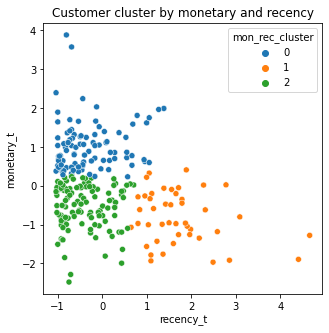

In [21]:
sns.scatterplot(data = df_integrated, x = 'recency_t', y = 'monetary_t', hue = 'mon_rec_cluster', palette = 'tab10').set(title = 'Customer cluster by monetary and recency')

##### Cross table for Cluster and Customer

In [22]:
ct2=pd.crosstab(df_integrated['mon_rec_cluster'], 
                df_integrated['customer'].value_counts())

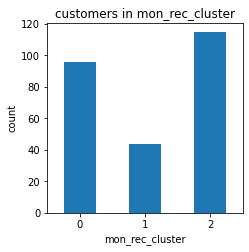

In [23]:
barplot2 = ct2.plot.bar(rot =360, legend = False, 
                        title = 'customers in mon_rec_cluster',
                       color = 'tab:blue', ylabel = 'count')

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(3.5, 3.5)

#### Cluster: monetary and gap

###### Determination of k 

Text(0.5, 1.0, 'inertia by number of clusters for monetary and Gap cluster')

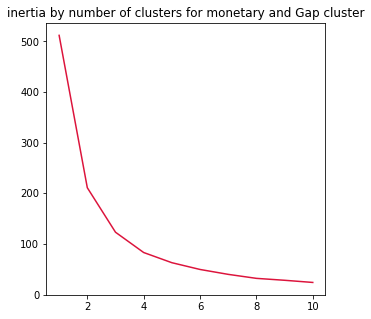

In [24]:
inertia_score3 = list()
for i in range(1,11):
    kmeans2 = KMeans(n_clusters = i)
    kmeans2.fit(df_integrated[['monetary_t', 'Gap_t']])
    inertia_score3.append(kmeans2.inertia_)
matplotlib.rcParams['figure.figsize'] = (5,5)
plt.plot(range(1,11), inertia_score3, color = 'crimson')
plt.title('inertia by number of clusters for monetary and Gap cluster')
    

##### instantiation of clustering 3


In [25]:
mon_gap_clusters = KMeans(n_clusters = 5)

##### model fitting

In [26]:
mon_gap_clusters.fit(df_integrated[['monetary_t', 'Gap_t']])

KMeans(n_clusters=5)

In [27]:
df_integrated['mon_gap_cluster'] = mon_gap_clusters.labels_

[Text(0.5, 1.0, ' customer cluster by monetary and Gap')]

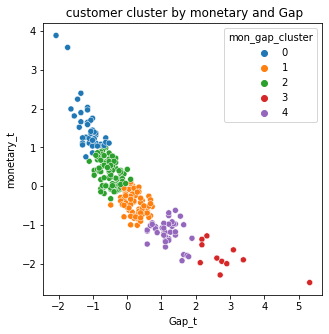

In [28]:
sns.scatterplot(data = df_integrated, x = 'Gap_t', y = 'monetary_t', 
                hue = 'mon_gap_cluster', palette = 'tab10').set(title =" customer cluster by monetary and Gap")

##### crosstab of cluster and customer 


In [29]:
ct3 = pd.crosstab(df_integrated['mon_gap_cluster'], 
                  df_integrated['customer'].value_counts())

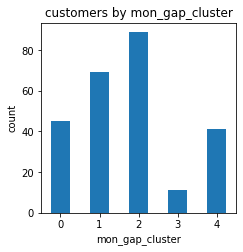

In [30]:
barplot3 = ct3.plot.bar(rot = 360, legend = False, 
                       title = 'customers by mon_gap_cluster', 
                       ylabel = "count", color = 'tab:blue')
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(3.5, 3.5)

#### Cluster: Frequency and Recency 

Text(0.5, 1.0, 'inertia by number of clusters for frequency and recency')

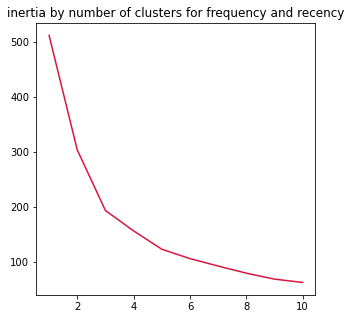

In [31]:
inertia_score4 = list()
for i  in range(1, 11):
    kmeans3 = KMeans(n_clusters = i)
    kmeans3.fit(df_integrated[['frequency_t', 'recency_t']])
    inertia_score4.append(kmeans3.inertia_)
matplotlib.rcParams['figure.figsize'] = (5,5)
plt.plot(range(1,11), inertia_score4, color = 'crimson')
plt.title('inertia by number of clusters for frequency and recency')

##### intantiation of clustering 4

In [32]:
freq_rec_cluster = KMeans(n_clusters = 3)

##### modeel fitting 

In [33]:
freq_rec_cluster.fit(df_integrated[['frequency_t', 'recency_t']])

KMeans(n_clusters=3)

In [34]:
df_integrated['freq_rec_cluster'] = freq_rec_cluster.labels_

[Text(0.5, 1.0, 'customer cluster by frequency and recency')]

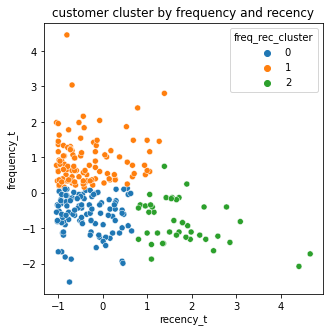

In [35]:
sns.scatterplot(data = df_integrated, 
                x = 'recency_t', y = 'frequency_t', 
                hue = 'freq_rec_cluster', palette = 'tab10').set(title="customer cluster by frequency and recency")

#####  cross table of freq__rec_cluster and customer


In [36]:
ct4= pd.crosstab(df_integrated['freq_rec_cluster'], 
                 df_integrated['customer'].value_counts())


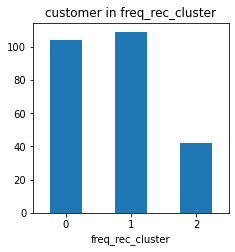

In [37]:
barplot4 = ct4.plot.bar(rot = 360, legend = False,
                       title = 'customer in freq_rec_cluster', 
                       color = 'tab:blue')
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(3.5, 3.5)

### RFM Three dimensional cluster Analysis 

###### find optimal number of k using elbow method 

Text(0.5, 1.0, 'inertia by number of clusters for recency, frequency and monetary')

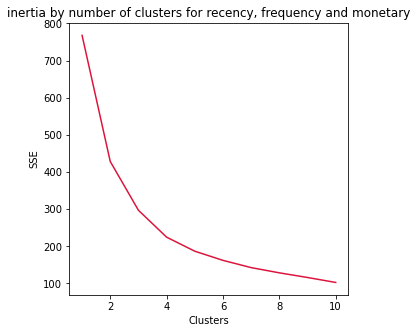

In [38]:
inertia_score5 = list()

for i in range(1, 11):
    kmeans5 = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans5.fit(df_integrated[['frequency_t', 'recency_t', 'monetary_t']])
    inertia_score5.append(kmeans5.inertia_)
matplotlib.rcParams["figure.figsize"]   = (5,5)
plt.plot(range(1,11), inertia_score5, color = 'crimson')
plt.xlabel('Clusters')
plt.ylabel('SSE')
plt.title('inertia by number of clusters for recency, frequency and monetary')


Comment: it is observered the that the optimum number of clusters would be 4 as SSE after from cluster 3 drops minimally. 

In [39]:
kmeans_optimum = KMeans(n_clusters = 3, init = 'k-means++',
                       random_state = 42)

In [40]:
RFM_Cluster = kmeans_optimum.fit(df_integrated[['frequency_t', 
                                                'recency_t', 'monetary_t']])
print(RFM_Cluster)


KMeans(n_clusters=3, random_state=42)


In [41]:
df_integrated['RFM_cluster'] = RFM_Cluster.labels_
df_integrated['RFM_cluster'][:10]

0    1
1    1
2    1
3    0
4    2
5    2
6    0
7    1
8    0
9    1
Name: RFM_cluster, dtype: int32

In [42]:
data1 = df_integrated[df_integrated.RFM_cluster==0]
data2 = df_integrated[df_integrated.RFM_cluster ==1]
data3 = df_integrated[df_integrated.RFM_cluster ==2]
#data4 = df_integrated[df_integrated.RFM_cluster == 3]

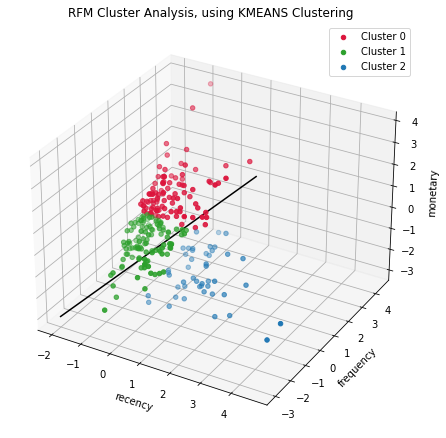

In [43]:
kplot = plt.axes(projection = "3d")
xline = np.linspace(-2,2,5)
yline = np.linspace(-3,2,5)
zline = np.linspace(-3,2,5)
kplot.plot3D(xline, yline, zline, 'black')
kplot.scatter3D(data1.recency_t, data1.frequency_t, data1.monetary_t, c='crimson', label = 'Cluster 0')
kplot.scatter3D(data2.recency_t, data2.frequency_t, data2.monetary_t, c= 'tab:green', label = "Cluster 1")
kplot.scatter3D(data3.recency_t, data3.frequency_t, data3.monetary_t, c= 'tab:blue', label = "Cluster 2")
#kplot.scatter3D(data4.recency_t, data4.frequency_t, data4.monetary_t, c= 'purple', label = "Cluster 3")
#plt.scatter(kmeans_optimum.cluster_centers_[:, 0], kmeans_optimum.cluster_centers_[:, 1], color = 'black', s= 100)
kplot.legend()
kplot.set_xlabel('recency')
kplot.set_ylabel('frequency')
kplot.set_zlabel('monetary')
kplot.set_title('RFM Cluster Analysis, using KMEANS Clustering')
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5, 7.5)



##### Cross tab to get the numbers of customer per cluster

In [44]:
crosstab = pd.crosstab( df_integrated['RFM_cluster'], df_integrated['customer'].value_counts())


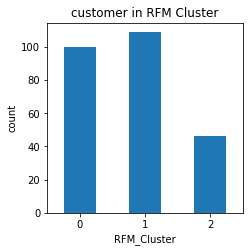

In [45]:

barplot = crosstab.plot.bar(rot = 360, legend = False, 
                            title = "customer in RFM Cluster", 
                            ylabel = 'count', xlabel = 'RFM_Cluster', 
                            color = 'tab:blue')
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(3.5, 3.5)
